# BTW 2021

## Fragenpool:

- In how many Wahlkreisen did the Greens lose votes compared to 2017?
- In how many Wahlkreisen did the AfD lose votes compared to 2017?
- What is the fraction of Wahlkreise for each party in which they did not reach 5%?
- Which party had the strongest decline/increase in any federal state?
- Which party had the most extreme results? &rarr; highest variance in votes by Wahlkreis
- Are the Pirates still relevant in any Wahlkreis/State?
- Which party below 5% had the best result in any Ort/Stadtteil around Würzburg?
- Which was the strongest below-5%-party per Ort/Stadtteil?
- Which Orte/Stadtteile voted most similar/dissimilar?
- Visualize the results of the local votes in a suitable way 

### Daten laden

In [1]:
#load packages
using CSV
using DataFrames
using StatsPlots

In [2]:
#loading data
land = CSV.read("Open-Data-Bundestagswahl1343_wue_land.csv", DataFrame)
land[:,:stadt] .= false
stadt = CSV.read("Open-Data-Bundestagswahl1343_wue_stadt.csv", DataFrame)
stadt[:,:stadt] .= true
stimmen = DataFrame()
append!(stimmen, land)
append!(stimmen, stadt)

,datum,wahl,ags,gebiet-nr,gebiet-name
,String,String,Int64,Missing,String
1,26.09.2021,Wahl zum Deutschen Bundestag,9679114,missing,Stadt Aub
2,26.09.2021,Wahl zum Deutschen Bundestag,9679117,missing,Gemeinde Bergtheim
3,26.09.2021,Wahl zum Deutschen Bundestag,9679118,missing,Gemeinde Bieberehren
4,26.09.2021,Wahl zum Deutschen Bundestag,9679122,missing,Markt Bütthard
5,26.09.2021,Wahl zum Deutschen Bundestag,9679124,missing,Stadt Eibelstadt
6,26.09.2021,Wahl zum Deutschen Bundestag,9679126,missing,Gemeinde Eisingen
7,26.09.2021,Wahl zum Deutschen Bundestag,9679128,missing,Gemeinde Erlabrunn
8,26.09.2021,Wahl zum Deutschen Bundestag,9679130,missing,Gemeinde Estenfeld
9,26.09.2021,Wahl zum Deutschen Bundestag,9679131,missing,Markt Frickenhausen a.Main


In [3]:
size(stadt), size(land), size(stimmen)

((13, 72), (52, 72), (65, 72))

### In welcher Gemeinde (um Wü) hat "Die Partei" die meisten Stimmen bekommen?

Wir betrachten zunächst absolute Stimmen

In [4]:
sort(stimmen[:,["gebiet-name","F9"]], :F9, rev=true)

,gebiet-name,F9
,String,Int64
1,FRAUENLAND,131
2,ALTSTADT,115
3,Gemeinde Veitshöchheim,97
4,Stadt Ochsenfurt,88
5,SANDERAU,84
6,HEIDINGSFELD,70
7,ZELLERAU,69
8,GROMBÜHL,64
9,Markt Rimpar,63


Auf Grund der deutlich unterschiedlich großen Gemeinden/Stadtteilen ist ein Blick auf die  relativen Zweitstimmen sinnvoller.

In [5]:
transform(stimmen, [:F9, :B] => ((a,b) -> a./b) => :Partei) |>
    x -> select(x, ["gebiet-name","B","F9","Partei"]) |>
    x -> sort(x, :Partei, rev=true)

,gebiet-name,B,F9,Partei
,String,Int64,Int64,Float64
1,Gemeinde Prosselsheim,811,17,0.0209618
2,Gemeinde Greußenheim,1158,24,0.0207254
3,Markt Winterhausen,988,19,0.0192308
4,Gemeinde Uettingen,1208,22,0.0182119
5,Gemeinde Kleinrinderfeld,1344,24,0.0178571
6,DÜRRBACHTAL,3690,59,0.0159892
7,Gemeinde Veitshöchheim,6107,97,0.0158834
8,Markt Giebelstadt,3198,50,0.0156348
9,Gemeinde Altertheim,1360,21,0.0154412


Nur Stadt Würzburg

In [6]:
transform(stimmen, [:F9, :B] => ((a,b) -> a./b) => :Partei) |>
    x -> filter(y -> y.stadt, x) |>
    x -> select(x, ["gebiet-name","A", "B","F9","Partei"]) |>
    x -> sort(x, :Partei, rev=true)

,gebiet-name,A,B,F9,Partei
,String,Int64,Int64,Int64,Float64
1,DÜRRBACHTAL,4453,3690,59,0.0159892
2,GROMBÜHL,6088,4558,64,0.0140412
3,HEIDINGSFELD,7787,5934,70,0.0117964
4,HEUCHELHOF,6516,4291,48,0.0111862
5,ZELLERAU,8410,6226,69,0.0110826
6,FRAUENLAND,14458,12074,131,0.0108498
7,STEINBACHTAL,3686,3227,32,0.00991633
8,VERSBACH,5337,4368,43,0.00984432
9,LENGFELD,8149,6418,62,0.00966033


### Wie hoch war die Wahlbeteiligung in den einzelnen Orten/Stadtteilen?

Wahlbeteiligung in Stadt und Land

In [7]:
transform(stimmen, [:A, :B] => ((a,b) -> b./a) => :Wb) |>
    x -> select(x, ["gebiet-name","A", "B","Wb"]) |>
    x -> rename(x, :A=>"Wahlberechtigte", :B=>"Wähler*innen") |>
    x -> sort(x, :Wb)#, rev=true)

,gebiet-name,Wahlberechtigte,Wähler*innen,Wb
,String,Int64,Int64,Float64
1,LINDLEINSMÜHLE,3302,2128,0.644458
2,HEUCHELHOF,6516,4291,0.658533
3,ZELLERAU,8410,6226,0.740309
4,GROMBÜHL,6088,4558,0.748686
5,HEIDINGSFELD,7787,5934,0.762039
6,LENGFELD,8149,6418,0.787581
7,Markt Giebelstadt,3986,3198,0.802308
8,Stadt Ochsenfurt,8476,6838,0.806748
9,Gemeinde Eisingen,2649,2153,0.81276


Wahlbeteiligung in der Stadt

In [8]:
transform(stimmen, [:A, :B] => ((a,b) -> b./a) => :Wb) |>
    x -> filter(y -> y.stadt, x) |>
    x -> select(x, ["gebiet-name","A", "B","Wb"]) |>
    x -> rename(x, :A=>"Wahlberechtigte", :B=>"Wähler*innen") |>
    x -> sort(x, :Wb)#, rev=true)

,gebiet-name,Wahlberechtigte,Wähler*innen,Wb
,String,Int64,Int64,Float64
1,LINDLEINSMÜHLE,3302,2128,0.644458
2,HEUCHELHOF,6516,4291,0.658533
3,ZELLERAU,8410,6226,0.740309
4,GROMBÜHL,6088,4558,0.748686
5,HEIDINGSFELD,7787,5934,0.762039
6,LENGFELD,8149,6418,0.787581
7,VERSBACH,5337,4368,0.818437
8,ROTTENBAUER,3177,2608,0.8209
9,SANDERAU,11148,9191,0.824453


### Wie war die Stimmenverteilung für die größten Parteien

Verhältnis Zweitstimmen

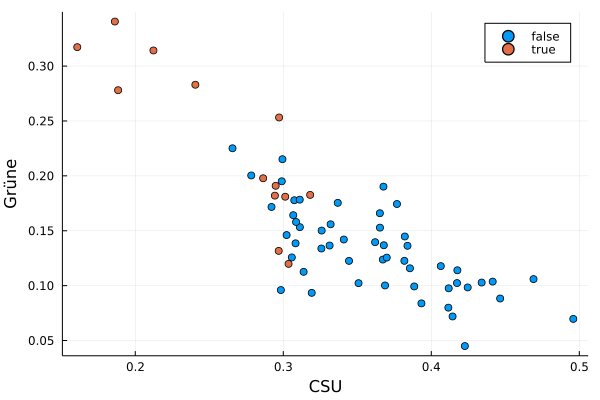

In [9]:
relative_stimmen = transform(stimmen,
    [:B, :F1] => ((a,b) -> b./a) => :CSU,
    [:B, :F2] => ((a,b) -> b./a) => :SPD,
    [:B, :F3] => ((a,b) -> b./a) => :AfD,
    [:B, :F4] => ((a,b) -> b./a) => :FDP,
    [:B, :F5] => ((a,b) -> b./a) => :Grüne,
    [:B, :F6] => ((a,b) -> b./a) => :Linke,)
    #x -> filter(y -> y.stadt, x) |>
    #x -> select(x, ["gebiet-name","A", "B","Wb"]) |>
    #x -> rename(x, :A=>"Wahlberechtigte", :B=>"Wähler*innen") |>
    #x -> sort(x, :Wb)#, rev=true)gr()
@df relative_stimmen scatter(
    :CSU, 
    :Grüne, 
    group = :stadt)
plot!(xlabel = "CSU", ylabel="Grüne")

#### Ein Violinenplot für jede Partei

In [10]:
stimmenstack = stack(relative_stimmen, [:CSU,:SPD,:AfD,:FDP, :Grüne, :Linke])[:,["gebiet-name","variable","value"]] |>
    x->transform(x, :variable => (y->string.(y)) => :variable)

,gebiet-name,variable,value
,String,String,Float64
1,Stadt Aub,CSU,0.417617
2,Gemeinde Bergtheim,CSU,0.367925
3,Gemeinde Bieberehren,CSU,0.42459
4,Markt Bütthard,CSU,0.441472
5,Stadt Eibelstadt,CSU,0.336809
6,Gemeinde Eisingen,CSU,0.311194
7,Gemeinde Erlabrunn,CSU,0.36767
8,Gemeinde Estenfeld,CSU,0.365312
9,Markt Frickenhausen a.Main,CSU,0.38848


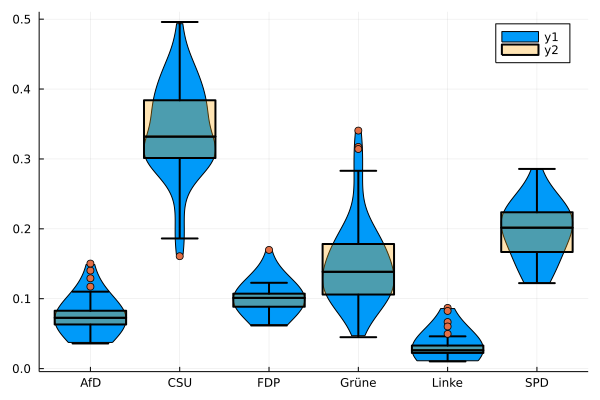

In [17]:
@df stimmenstack violin(:variable, :value)
@df stimmenstack boxplot!(:variable, :value, line = (2, :black), fill = (0.3, :orange))

### Orte/Stadtteile sortiert nach Stimmanteilen für bestimmte Parteien

In [12]:
sort(relative_stimmen, :FDP, rev=true)[:,["gebiet-name","FDP"]]

,gebiet-name,FDP
,String,Float64
1,STEINBACHTAL,0.169817
2,ALTSTADT,0.122755
3,FRAUENLAND,0.118353
4,Markt Gelchsheim,0.118151
5,Stadt Eibelstadt,0.1165
6,Gemeinde Waldbrunn,0.114271
7,ROTTENBAUER,0.113497
8,Markt Eisenheim,0.113413
9,LENGFELD,0.11125


In [13]:
sort(relative_stimmen, :Grüne, rev=true)[:,["gebiet-name","Grüne","FDP","CSU","AfD","SPD"]]

,gebiet-name,Grüne,FDP,CSU,AfD,SPD
,String,Float64,Float64,Float64,Float64,Float64
1,ALTSTADT,0.34057,0.122755,0.186208,0.0380717,0.162024
2,GROMBÜHL,0.317244,0.1086,0.160816,0.0443177,0.185388
3,SANDERAU,0.31422,0.106517,0.212273,0.0360135,0.182896
4,FRAUENLAND,0.283005,0.118353,0.2406,0.0430677,0.179477
5,ZELLERAU,0.278028,0.0849663,0.188403,0.0631224,0.199165
6,STEINBACHTAL,0.253176,0.169817,0.29718,0.0393554,0.137279
7,Gemeinde Gerbrunn,0.225121,0.0987923,0.2657,0.0538647,0.211836
8,Markt Höchberg,0.21516,0.107031,0.299435,0.0477087,0.218927
9,Markt Zell a.Main,0.200373,0.1,0.278358,0.0697761,0.224254


In [14]:
sort(relative_stimmen, :AfD, rev=true)[:,["gebiet-name","AfD","Grüne","FDP","CSU","SPD"]]

,gebiet-name,AfD,Grüne,FDP,CSU,SPD
,String,Float64,Float64,Float64,Float64,Float64
1,HEUCHELHOF,0.150315,0.131671,0.0990445,0.2969,0.199487
2,Gemeinde Riedenheim,0.140288,0.044964,0.106115,0.422662,0.122302
3,LINDLEINSMÜHLE,0.129229,0.119831,0.0864662,0.303571,0.232143
4,Markt Giebelstadt,0.117261,0.102251,0.106316,0.350844,0.175109
5,Gemeinde Oberpleichfeld,0.110092,0.0799476,0.102228,0.411533,0.145478
6,Markt Neubrunn,0.109673,0.115804,0.0865123,0.385559,0.166894
7,Gemeinde Tauberrettersheim,0.103565,0.0882852,0.0848896,0.44652,0.140917
8,Gemeinde Kist,0.0946024,0.0934417,0.107371,0.319211,0.253627
9,Gemeinde Theilheim,0.0920171,0.125533,0.107252,0.369896,0.190737


In [15]:
sort(relative_stimmen, :CSU)[:,["gebiet-name","CSU","Grüne","FDP","AfD","SPD"]]

,gebiet-name,CSU,Grüne,FDP,AfD,SPD
,String,Float64,Float64,Float64,Float64,Float64
1,GROMBÜHL,0.160816,0.317244,0.1086,0.0443177,0.185388
2,ALTSTADT,0.186208,0.34057,0.122755,0.0380717,0.162024
3,ZELLERAU,0.188403,0.278028,0.0849663,0.0631224,0.199165
4,SANDERAU,0.212273,0.31422,0.106517,0.0360135,0.182896
5,FRAUENLAND,0.2406,0.283005,0.118353,0.0430677,0.179477
6,Gemeinde Gerbrunn,0.2657,0.225121,0.0987923,0.0538647,0.211836
7,Markt Zell a.Main,0.278358,0.200373,0.1,0.0697761,0.224254
8,VERSBACH,0.286401,0.197802,0.101419,0.0638736,0.215888
9,Markt Reichenberg,0.292045,0.171668,0.106769,0.0680391,0.216329


In [16]:
sort(relative_stimmen, :Linke, rev=true)[:,["gebiet-name","Linke", "CSU","Grüne","FDP","AfD","SPD"]]

,gebiet-name,Linke,CSU,Grüne,FDP,AfD
,String,Float64,Float64,Float64,Float64,Float64
1,ZELLERAU,0.0868937,0.188403,0.278028,0.0849663,0.0631224
2,GROMBÜHL,0.0824923,0.160816,0.317244,0.1086,0.0443177
3,ALTSTADT,0.0666454,0.186208,0.34057,0.122755,0.0380717
4,SANDERAU,0.0602764,0.212273,0.31422,0.106517,0.0360135
5,FRAUENLAND,0.0496936,0.2406,0.283005,0.118353,0.0430677
6,Gemeinde Gerbrunn,0.0461353,0.2657,0.225121,0.0987923,0.0538647
7,LINDLEINSMÜHLE,0.0451128,0.303571,0.119831,0.0864662,0.129229
8,HEIDINGSFELD,0.0433097,0.301314,0.180991,0.0925177,0.0682508
9,STEINBACHTAL,0.040595,0.29718,0.253176,0.169817,0.0393554
